In [1]:
# Uploading files from your local file system

#files modified form last notebook

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dates.csv to dates.csv
Saving deaths.csv to deaths.csv
Saving pumps.csv to pumps.csv
User uploaded file "dates.csv" with length 815 bytes
User uploaded file "deaths.csv" with length 10694 bytes
User uploaded file "pumps.csv" with length 283 bytes


# John Snow

## Introduction

<left><img width="150" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_final1.png"></left>


Dr. John Snow (1813-1858) was a famous British physician and is widely recognized as a legendary figure in the history of public health and a leading pioneer in the development of anesthesia. Some even say one of the greatest physicians of all time.</p>

As a leading advocate of both anesthesia and hygienic practices in medicine, he not only experimented with ether and chloroform but also designed a mask and method how to administer it. He personally administered chloroform to Queen Victoria during the births of her eighth and ninth children, in 1853 and 1857, which assured a growing public acceptance of the use of anesthetics during childbirth.

But, as we will show later, not all his life was just a success. John Snow is now also recognized as one of the founders of modern epidemiology (some also consider **him as the founder of data visualization**, spatial analysis, data science in general, and many other related fields) for his scientific and pretty modern data approach in identifying the source of a cholera outbreak in Soho, London in 1854, but it wasn't always like this. In fact, for a long time, he was simply ignored by the scientific community and currently is very often mythified.

In this notebook, we're not only going to rediscover his "data story", but reanalyze the data that he collected in 1854 and recreate his famous map (also called The Ghost Map).


A big thank you to [Robin Wilson](http://blog.rtwilson.com/john-snows-famous-cholera-analysis-data-in-modern-gis-formats/) from Southampton University who digitized John Snow’s original data and georeferenced it to the Ordnance Survey co-ordinate system which will allow us to analyze it and overlay it on modern maps of that area.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Read about Dr. John Snow to the right.
- Load in the **pandas** module.
- Import the data **datasets/deaths.csv** and assign the resulting DataFrame to **deaths**.
- Print out the first rows of deaths.

In [2]:
# put your code here
import pandas as pd
deaths = pd.read_csv('deaths.csv')
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
Death           489 non-null int64
X coordinate    489 non-null float64
Y coordinate    489 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.5 KB


## Cholera attacks!

<left><img width="200" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_cholera1.jpg"></left>

Prior to John Snow's discovery cholera was a regular visitor to London’s overcrowded and unsanitary streets. During the time of the third cholera outbreak, it was one of the most studied subjects (between years 1839-1856 over 700 studies and essays were published in London alone) and nearly all of the authors believed the outbreaks were due to miasma or "bad air". 

It was John Snow's pioneering work with anesthesia and gases that made him doubt the miasma model of the disease. Originally he formulated and published his theory that cholera is spread by water or food  in an essay On the Mode of Communication of Cholera (before the outbreak in 1849). The essay received negative reviews in the Lancet and the London Medical Gazette. 

We know now that he was right, but Dr. Snow's dilemma was how to prove it? His first step to getting there was checking the data. Our dataset has 489 rows of data in 3 columns but to work with dataset more easily we will first make few changes. 

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Summarize the content of **deaths** (from previous exercise) with **.info()** method.
- Prepare dictionary that will be used to rename the **Death**, **X coordinate**, and **Y coordinate** columns to **death_count**, **x_latitude**, and **y_longitude**, respectively.
- Rename the columns of the dataset with the **.rename()** method.
- Describe the dataset with the **.describe()** method.

In [3]:
display(deaths.info())

rename_dict = {'Death': 'death_count', 'X coordinate': 'x_latitude', 'Y coordinate': 'y_longitude'}
deaths = deaths.rename(columns=rename_dict)
deaths.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
Death           489 non-null int64
X coordinate    489 non-null float64
Y coordinate    489 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.5 KB


None

,death_count,x_latitude,y_longitude
count,489.0,489.000000,489.000000
mean,1.0,51.513398,-0.136403
std,0.0,0.000705,0.001503
min,1.0,51.511856,-0.140074
25%,1.0,51.512964,-0.137562
50%,1.0,51.513359,-0.136226
75%,1.0,51.513875,-0.135344
max,1.0,51.515834,-0.132933


## You know nothing, John Snow!

<left><img width="300" 
src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_cholera_king2.png"></left>

It was somehow unthinkable that one man could debunk the miasma theory and prove that all the others got it wrong, so his work was mostly ignored. His medical colleagues simply said: "You know nothing, John Snow!"

As already mentioned John Snow's first attempt to debunk the "miasma" theory ended with negative reviews. However, a reviewer made a helpful suggestion in terms of what evidence would be compelling: the crucial natural experiment would be to find people living side by side with lifestyles similar in all respects except for the water source. The cholera outbreak in Soho, London in 1854 gave Snow the opportunity not only to save lives this time but also to further test and improve his theory. But what about the final proof that he was right? 

We now know how John Snow did it, so let's get the data right first.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- **Prepare** and **pre-process** the data for plotting.
    - Create a subset (called **locations**) of the original dataset selecting only **x_latitude** and **y_longitude** columns.
    - Transform this subset into list of **x_latitude** and **y_longitude** pairs and name it **deaths_list**. (tip: [here](https://stackoverflow.com/questions/28006793/pandas-dataframe-to-list-of-lists/28006809))
    - Check the length of this list (the number of pairs).

In [4]:
locations = deaths.loc[:,['x_latitude', 'y_longitude']]
deaths_list = locations.values.tolist()
display("List size: " + str(len(deaths_list)))

'List size: 489'

## The Ghost Map

<left><img width="300" 
src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_original.jpg">
</left>

His original map, unfortunately, is not available (it might never even existed). We can see the famous one that he drew about a year later in 1855, though, and it is displayed in this cell. Because the map depicts and visualizes the deaths sometimes it is called also **The Ghost Map**. 

We now know how John Snow did it and have the data too, so let's recreate his map using modern techniques.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Loop through the **pre-processed** data to create a map.
- Fill in the **len** function to loop through the data.

In [5]:
!pip install folium

    100% |████████████████████████████████| 92kB 3.6MB/s 


In [6]:


# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

m = folium.Map(location=[51.5132119,-0.13666], tiles='Stamen Toner', zoom_start=17)

for point in range(0, len(deaths_list)):
    folium.CircleMarker(deaths_list[point], 
                        radius=8, color='red', 
                        fill=True, fill_color='red', 
                        opacity = 0.4).add_to(m)
m

The map displayed in the notebook is also in the 2nd reprint of On the Mode of Communication of Cholera (1855) that is publicly available here.

## It's the pump!

<left><img width="300" 
src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_caricature1.jpg">
</left>

After marking the deaths on the map, what John Snow saw was not a random pattern (we saw this on our recreation of The Ghost Map too). The majority of the deaths were concentrated at the corner of Broad Street (now Broadwick Street) and Cambridge Street (now Lexington Street). A cluster of deaths around the junction of these streets was the epicenter of the outbreak, but what was there? Yes, a water pump.

John Snow at the time already had a developed theory that cholera spreads through water, so to test this he marked on the map also the locations of the water pumps nearby. And here it was, the whole picture.

By combining the location of deaths related to cholera with locations of the water pumps, Snow was able to show that the majority were clustered around one particular public water pump in Broad Street, Soho. Finally, he had the proof that he needed.

We will now do the same and add the locations of the pumps to our recreation of The Ghost Map.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Recreate The Ghost Map.
    - Import the data **datasets/pumps.csv** and assign the resulting DataFrame to **pumps**.
    - Create subset **locations_pumps** of the original dataset (select only **'X coordinate'** and **'Y coordinate'** columns).
    - Transform this subset into list of **'X coordinate'** and **'Y coordinate'** pairs and call it **pumps_list**.
    - Create for loop to plot all the points on a map (we will use folium/Leaflet library again).


In [7]:
# Import the data
pumps = pd.read_csv('pumps.csv')

# Subset the DataFrame and select just ['X coordinate', 'Y coordinate'] columns
locations_pumps = pumps.loc[:,['X coordinate', 'Y coordinate']]

# Transform the DataFrame to list of lists in form of ['X coordinate', 'Y coordinate'] pairs
pumps_list = locations_pumps.values.tolist()

# Create a for loop and plot the data using folium (use previous map + add another layer)
map1 = m
for point in range(0, len(pumps_list)):
    folium.Marker(pumps_list[point], popup=pumps['Pump Name'][point]).add_to(map1)
map1

## You know nothing, John Snow! (again)

<left><img width="500" 
src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_map1.jpg">
</left>

So, John Snow finally had his proof that there was a connection between deaths as a consequence of the cholera outbreak and the public water pump that was probably contaminated. But he didn't just stop there and investigated further.

He was looking for **anomalies** now (we would now say "outliers in data") and found two in fact where there were no deaths. **First was brewery right on the Broad Street**, so he went there and learned that they drank mostly beer (in other words not the water from the local pump, which confirms his theory that the pump is the source of the outbreak). The second building without any deaths was **workhouse near Poland street** where he learned that their source of water was not the pump on the Broad Street (confirmation again). The locations of both buildings are visualized also on the map on the above.

He was now sure, and although officials did not trust him nor his theory they removed the handle to the pump next day, 8th of September 1854. John Snow later collected and published in his famous book also all the data about deaths in chronological order, before and after the peak of the outbreak and we will now analyze and compare the effect when the handle was removed.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- **Reanalyze** the John Snow's data about the Cholera Outbreak.
    - Import the data **datasets/dates.csv** as DataFrame **dates** and parse date column as the **datetime** data type.
    - Create new column **day_name** that will contain name of the day (Monday to Sunday) using **dt.weekday_name** attribute.
    - Create new column **handle** that will contain a Boolean (**True** or **False**) for whether or not the handle was present.

In [8]:

# Import the data the right way
dates = pd.read_csv('dates.csv', parse_dates=['date'])

# Set the Date when handle was removed (8th of September 1854)
handle_removed = pd.to_datetime('1854/9/8')

# Create new column `day_name` in `dates` DataFrame with names of the day 
dates['day_name'] = dates['date'].dt.weekday_name



# Create new column `handle` in `dates` DataFrame based on a Date the handle was removed 
dates['handle'] = dates['date'] > handle_removed

# Check the dataset and datatypes
dates.info()

# Create a comparison of how many cholera deaths and attacks there were before and after the handle was removed
dates.groupby(['handle']).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
order       43 non-null int64
date        43 non-null datetime64[ns]
attacks     43 non-null int64
deaths      43 non-null int64
day_name    43 non-null object
handle      43 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 1.8+ KB


,order,attacks,deaths
handle,,,
False,231,528,500
True,715,43,116


## The picture worth a thousand words
<img style="float: left;margin:5px 20px 5px 1px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_pump1.jpg"> 

Removing the handle from the pump prevented any more of the infected water from being collected. The spring below the pump was later found to have been contaminated with sewage. This act was later recognized as an early example of epidemiology, public health medicine and the application of science (the germ theory of disease) in a real-life crisis.

A replica of the pump, together with an explanatory and memorial plaque and without a handle was erected in 1992  near the location of the original close to the back wall of what today is the John Snow pub. The site is subtly marked with a pink granite kerbstone in front of a small wall plaque.

We can learn a lot from John Snow's data. We can take a look at absolute counts, but this observation could lead us to a wrong conclusion so let's take a different look on the data using [Plotly](https://github.com/plotly/plotly.py/). 

Thanks to John Snow we have the data in chronological order (i.e. as time series data), so the best way to see the whole picture is to visualize it and look at it the way he saw it while writing **On the Mode of Communication of Cholera (1855).**

## John Snow's myth & Did we learn something?
<left><img style="float: left;margin:5px 20px 5px 1px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_water1.jpg"></left>

From the previous interactive visualization, we can clearly see that the peak of the cholera outbreak happened before removing the handle and it was already in decline (downside trajectory) before the 8th of September 1854.

This different view on the data is very important because in case that we compare just absolute numbers this could lead us to wrong conclusion that removing the handle on Broad Street pump for sure stopped the outbreak, which is simply not true (it surely did help but did not stop the outbreak) and John Snow was aware of this (he just did what needed to be done and never aspired to become a hero).

But people love stories about heroes and other myths (definitely more than science or data science). According to John Snow's myth, he was the superhero who in two days defied their equals by hypothesizing that cholera was a waterborne disease. Despite no one listening to him, he bravely continued drawing his map, convinced local authorities to remove the handle of the infected water pump with his findings, and stopped the outbreak. John Snow saved the lives of many Londoners.

If we take a better look behind this story, we can find also the true John Snow, who was fighting the disease with limited tools and wanted to get proof that he was right and "knew something" about cholera. He just did what he could with limited time and always boiled his water before drinking.

It's visible through a time series plot that the death peak occurred in 02/09/1854


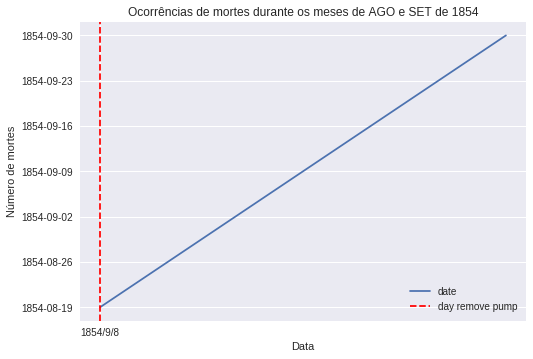

In [11]:
import matplotlib.pyplot as plt
plt.plot(dates['date']), dates['deaths']
plt.title("Ocorrências de mortes durante os meses de AGO e SET de 1854")


plt.axvline(x='1854/9/8', color='red', label='day remove pump', linestyle='--')
plt.legend()
plt.xlabel("Data")
plt.ylabel("Número de mortes")

# Based on John Snow's map and the data John Snow collected, what would you say?
john_snow_knows_nothing = "It's visible through a time series plot that the death peak occurred in 02/09/1854"

print(john_snow_knows_nothing)